In [3]:
#!pip install geopy

In [9]:
#!pip install folium

In [11]:
#!pip install IPython

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.core.display import display, HTML
import time

C:\Users\sarda\AppData\Local\Temp\ipykernel_10840\30944406.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# Importing Datasets

In [151]:
df1 = pd.read_csv(r"C:\Users\sarda\Downloads\zomato_data.csv")
df2 = pd.read_csv(r"C:\Users\sarda\Downloads\Geographical Coordinates.csv")
df1

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6 /5,27,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,No,No,NaN,0,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,No,No,NaN,0,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,No,Yes,4.3 /5,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [153]:
df2.head(7)

,listed_incity,Latitude,Longitude
0,Banashankari,12.939333,77.553982
1,Bannerghatta Road,12.952660,77.605048
2,Basavanagudi,12.941726,77.575502
3,Bellandur,12.925352,77.675941
4,Brigade Road,12.967358,77.606435
5,Brookefield,12.963814,77.722437
6,BTM,12.916360,77.604733


In [155]:
df1.info(),df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         -------------- 

(None, None)

# Data Cleaning & Preprocessing

## Rating Column (rate)

In [158]:
df1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [160]:
def ratefunc(x):
    if pd.isna(x):
        return np.NaN
    x = str(x).strip()
    if x == 'NEW' or x == '-':
        return np.NaN
    elif '/5' in x:
        return x.replace('/5', '').strip()
    else:
        return x.strip()

df1['rate'] = df1['rate'].apply(ratefunc)
df1['rate'] = pd.to_numeric(df1['rate'], errors='coerce')

In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  object 
 1   book_table                 51717 non-null  object 
 2   rate                       41665 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51490 non-null  object 
 5   dish_liked                 23639 non-null  object 
 6   cuisines                   51672 non-null  object 
 7   approx_costfor_two_people  51371 non-null  object 
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.9+ MB


In [164]:
df1['rate'].fillna(df1['rate'].median(),inplace=True)

C:\Users\sarda\AppData\Local\Temp\ipykernel_10840\1066591800.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['rate'].fillna(df1['rate'].median(),inplace=True)


In [166]:
df1['rate'].isna().sum()

0

## Cost Column (approx_costfor_two_people)

In [168]:
df1['approx_costfor_two_people'] = (
    df1['approx_costfor_two_people']
    .astype(str)                        
    .str.replace(',', '')             
    .str.strip()                       
)

df1['approx_costfor_two_people'] = pd.to_numeric(
    df1['approx_costfor_two_people'], errors='coerce'
)


In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  object 
 1   book_table                 51717 non-null  object 
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51490 non-null  object 
 5   dish_liked                 23639 non-null  object 
 6   cuisines                   51672 non-null  object 
 7   approx_costfor_two_people  51371 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [ ]:
df1['approx_costfor_two_people'].isna().sum()

In [176]:
df1['approx_costfor_two_people'].fillna(df1['approx_costfor_two_people'].median(),inplace=True)

C:\Users\sarda\AppData\Local\Temp\ipykernel_10840\1369114701.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['approx_costfor_two_people'].fillna(df1['approx_costfor_two_people'].median(),inplace=True)


In [178]:
df1['approx_costfor_two_people'].isna().sum()

0

## Categorical Columns

In [192]:
df1['dish_liked'].isna().sum()

28078

In [194]:
df1['cuisines'].isna().sum()

45

In [196]:
df1['rest_type'].isna().sum()

227

In [200]:
df1['dish_liked'] = df1['dish_liked'].fillna('Not Available')
df1['cuisines'] = df1['cuisines'].fillna('Other')
df1['rest_type'] = df1['rest_type'].fillna('Unknown')

In [202]:
df1['dish_liked'].isna().sum(),df1['cuisines'].isna().sum(),df1['rest_type'].isna().sum()

(0, 0, 0)

## Votes Column

In [208]:
df1['votes'].isna().sum()

0

## Binary Encoding

In [210]:
binary_map = {'Yes': 1, 'No': 0}
df1['online_order'] = df1['online_order'].map(binary_map)
df1['book_table'] = df1['book_table'].map(binary_map)

In [212]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


## Data Type Conversion

In [216]:
df1['approx_costfor_two_people'] = pd.to_numeric(df1['approx_costfor_two_people'], errors='coerce').astype('Int64')

In [218]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  Int64  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: Int64(1), float64(1), int64(3), object(5)
memory usage: 4.0+ MB


In [220]:
df1.describe()

,online_order,book_table,rate,votes,approx_costfor_two_people
count,51717.000000,51717.000000,51717.000000,51717.000000,51717.0
mean,0.588665,0.124698,3.700362,283.697527,554.391689
std,0.492080,0.330379,0.395391,803.838853,437.563723
min,0.000000,0.000000,1.800000,0.000000,40.0
25%,0.000000,0.000000,3.500000,7.000000,300.0
50%,1.000000,0.000000,3.700000,41.000000,400.0
75%,1.000000,0.000000,3.900000,198.000000,650.0
max,1.000000,1.000000,4.900000,16832.000000,6000.0


In [ ]:
# What is the shape of the given dataset?

In [231]:
df1.shape

(51717, 10)

In [235]:
df1.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [259]:
# 2. How many restaurants serve North Indian cuisine?
df1[df1['cuisines'].str.contains('North Indian', na=False)].shape

(21085, 10)

In [263]:
# 3. What cuisine is most commonly offered by restaurants in Bangalore?
df1['cuisines'].value_counts()

cuisines
North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: count, Length: 2724, dtype: int64

<Axes: xlabel='cuisines'>

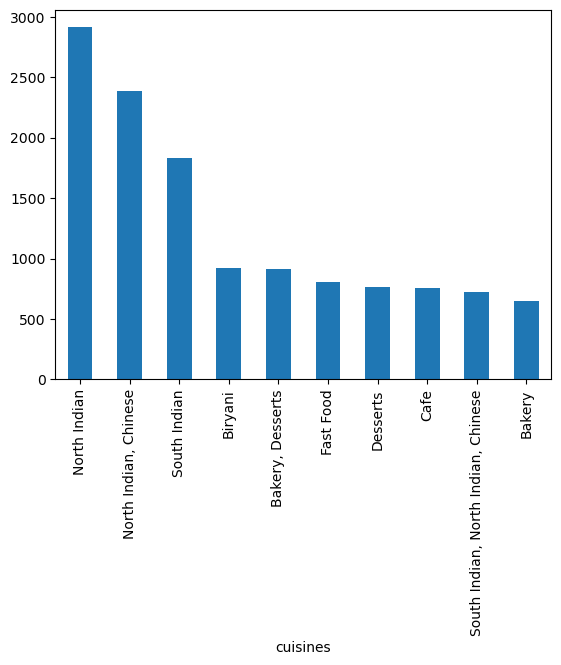

In [265]:
df1['cuisines'].value_counts()[:10].plot.bar()

In [271]:
# 4. Which locality in Bangalore has the highest average cost for dining (for two people)?
df1.groupby(by='listed_incity')['approx_costfor_two_people'].mean().sort_values(ascending=False)

listed_incity
Church Street            770.361248
Brigade Road             766.676088
MG Road                  759.364992
Lavelle Road              751.15195
Residency Road           739.573457
Indiranagar              652.973118
Old Airport Road         605.698246
Whitefield               577.722222
Malleshwaram             574.470803
Frazer Town               557.56962
Bellandur                550.236349
Sarjapur Road            540.412371
Koramangala 4th Block    527.106873
Koramangala 5th Block    521.981664
Brookefield              521.086957
Koramangala 6th Block    520.091498
Koramangala 7th Block    519.513274
Marathahalli             497.462327
Electronic City          496.639544
BTM                      495.077463
HSR                      487.461229
Rajajinagar              485.078777
Kalyan Nagar             479.144385
Kammanahalli             470.127916
Jayanagar                468.814846
JP Nagar                 459.546756
New BEL Road             456.418919
Bannerghatta R

In [294]:
# 5. Which restaurant type has the top rating with over 1000 votes?
filtered_df = df1[df1['votes'] > 1000]
top_rated = filtered_df.loc[filtered_df['rate'].idxmax()]
print(top_rated)

online_order                                                                 1
book_table                                                                   1
rate                                                                       4.9
votes                                                                    16345
rest_type                                                         Microbrewery
dish_liked                   Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...
cuisines                     Continental, North Indian, Italian, South Indi...
approx_costfor_two_people                                                 1600
listed_intype                                                         Delivery
listed_incity                                                        Bellandur
Name: 3921, dtype: object


<Axes: >

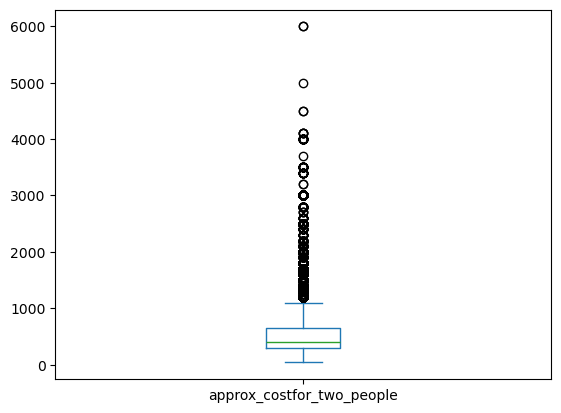

In [300]:
df1['approx_costfor_two_people'].plot.box()

In [298]:
# 6. How much does it cost at minimum to eat out in Bangalore?
df1['approx_costfor_two_people'].sort_values()

12232      40
29785      40
32485      40
14819      40
17773      40
         ... 
42141    4500
41591    4500
40266    5000
45618    6000
19139    6000
Name: approx_costfor_two_people, Length: 51717, dtype: Int64

In [313]:
df1[(df1['approx_costfor_two_people'] == 40)]

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
5270,1,0,3.7,129,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,Delivery,Brigade Road
12232,1,0,3.7,129,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,Delivery,Church Street
14819,1,0,3.7,131,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,Delivery,Frazer Town
17773,1,0,3.9,160,Quick Bites,"Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...","South Indian, North Indian, Chinese",40,Delivery,Indiranagar
18891,1,0,3.7,129,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,Dine-out,Indiranagar
27091,1,0,3.6,108,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40,Delivery,Koramangala 4th Block
29785,1,0,3.6,108,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40,Delivery,Koramangala 5th Block
32485,1,0,3.9,162,Quick Bites,"Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...","South Indian, North Indian, Chinese",40,Delivery,Koramangala 6th Block


In [319]:
#  What percentage of total online orders is received by restaurants in Banashankari?
total_online_orders = df1[df1['listed_incity'] == 'Banashankari'].shape[0]
banashankari_online_orders = df1[(df1['online_order'] == 1) & (df1['listed_incity'] == 'Banashankari')].shape[0]
print((banashankari_online_orders / total_online_orders) * 100)

63.26767091541136


In [329]:
# Which locality has the most restaurants with over 500 votes and a rating below 3.0?
df1[(df1['votes']>=500) & (df1['rate']<3.0)].groupby('listed_incity')['listed_incity'].count().sort_values()

listed_incity
HSR                      1
Kalyan Nagar             1
Kammanahalli             1
Banashankari             2
Koramangala 4th Block    2
Koramangala 5th Block    2
Koramangala 6th Block    2
Koramangala 7th Block    2
Sarjapur Road            2
Bellandur                3
Marathahalli             3
Indiranagar              4
Old Airport Road         4
Whitefield               6
Brookefield              8
Name: listed_incity, dtype: int64

In [333]:
# Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?
df1.groupby('listed_incity')['rest_type'].nunique().sort_values(ascending=False).head(1)

listed_incity
BTM    62
Name: rest_type, dtype: int64

In [360]:
# What's the average cost difference between buffet and delivery restaurants?
df1[(df1['listed_intype']=='Buffet') | (df1['listed_intype']=='Delivery')].groupby('listed_intype')['approx_costfor_two_people'].agg(['min','max','mean'])

,min,max,mean
listed_intype,,,
Buffet,300,4100,1295.351474
Delivery,40,3000,464.100108


In [366]:
1295-464

831

In [370]:
# What is the maximum number of votes received by any restaurant with online ordering?
df1[df1['online_order']==1]['votes'].max()

16832

In [374]:
# What is the average rating of restaurants that serve both North Indian and Chinese cuisines?
df1[(df1['cuisines'].str.contains('North Indian', na=False)) & (df1['cuisines'].str.contains('Chinese', na=False))]['rate'].mean()

3.5919080217658412

In [378]:
# 13. What is the most profitable area for Zomato based on potential revenue estimation?
df1['potential_revenue'] = df1['approx_costfor_two_people'] * df1['votes']
area_revenue = df1.groupby('listed_incity')['potential_revenue'].sum().sort_values(ascending=False)
area_revenue.idxmax()

'Koramangala 7th Block'

In [384]:
# 14. If Zomato wants to reduce customer complaints, which restaurant type should they focus on?
df1['rate'] = pd.to_numeric(df1['rate'], errors='coerce')
low_rated = df1[df1['rate'] < 3.0]
complaint_by_rest_type = low_rated['rest_type'].value_counts()
complaint_by_rest_type.idxmax()

'Quick Bites'

In [390]:
# Filter based on all 3 criteria
target_restaurants = df1[
    (df1['rate'] > 4.2) &
    (df1['votes'] > 500) &
    (df1['online_order'] == 1)
]
investment_areas = target_restaurants['listed_incity'].value_counts()
investment_areas.idxmax()

'Koramangala 7th Block'

In [392]:
df = pd.merge(df1, df2, on='listed_incity', how='left')

In [396]:
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,potential_revenue,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,620000,12.939333,77.553982
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari,629600,12.939333,77.553982
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,734400,12.939333,77.553982
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari,26400,12.939333,77.553982
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari,99600,12.939333,77.553982


In [400]:
import folium
from folium.plugins import HeatMap
df_map = df.dropna(subset=['Latitude', 'Longitude'])
bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_map.iterrows()]
HeatMap(heat_data).add_to(bangalore_map)
bangalore_map

In [404]:
italian_df = df[df['cuisines'].str.contains("Italian", na=False)]
italian_df = italian_df.dropna(subset=['Latitude', 'Longitude'])
italian_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
for _, row in italian_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color='red', icon='cutlery', prefix='fa')
    ).add_to(italian_map)
italian_map